# Test time series signals (vehicle motion, GNSS, ...)

In [1]:
import aeifdataset as ad
from aeifdataset import Dataloader
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

## Load data

In [2]:
data_path = '../data/' # Path to your .4mse files

# Access the whole dataset
# The Dataloader class loads and manages multiple .4mse files from the specified directory.
dataset = Dataloader(data_path)

# Iterate through Data Records and Frames
frames = []
for datarecord in dataset:
    for frame in datarecord:
        frames.append(frame)

In [3]:
# see all fields
print('all members of frame.vehicle:')
print([field for field in dir(frames[0].vehicle) if field[0] != '_' ])

print('all members of frame.vehicle.DYNAMICS:')
print([field for field in dir(frames[0].vehicle.DYNAMICS) if field[0] != '_' ])

print('all members of frame.vehicle.GNSS:')
print([field for field in dir(frames[0].vehicle.GNSS) if field[0] != '_' ])

print('all members of frame.vehicle.IMU:')
print([field for field in dir(frames[0].vehicle.IMU) if field[0] != '_' ])

all members of frame.vehicle:
['DYNAMICS', 'GNSS', 'IMU', 'cameras', 'from_bytes', 'info', 'lidars', 'to_bytes']
all members of frame.vehicle.DYNAMICS:
['from_bytes', 'heading', 'info', 'to_bytes', 'velocity']
all members of frame.vehicle.GNSS:
['from_bytes', 'info', 'position', 'to_bytes']
all members of frame.vehicle.IMU:
['from_bytes', 'info', 'motion', 'to_bytes']


## Visualize some time series data

Important notes:

1. **Different .4mse may be loaded in no particular order**! This may induce "time jumps" - should be fixed so we can skip sorting.

2. **Heading not filled yet?** 

,timestamp,lin_x,lin_y,lin_z,ang_x,ang_y,ang_z,velocity_kmh
datetime,,,,,,,,
2024-09-27 08:35:42.301103586,2024-09-27_10-35-42.301103586,2.532979,2.532979,2.532979,-0.002151,-0.002151,-0.002151,23.086650
2024-09-27 08:35:42.302613010,2024-09-27_10-35-42.302613010,2.534016,2.534016,2.534016,0.000806,0.000806,0.000806,23.078149
2024-09-27 08:35:42.303132541,2024-09-27_10-35-42.303132541,2.535141,2.535141,2.535141,0.000145,0.000145,0.000145,23.069732
2024-09-27 08:35:42.304120395,2024-09-27_10-35-42.304120395,2.536304,2.536304,2.536304,0.000504,0.000504,0.000504,23.061427
2024-09-27 08:35:42.305620493,2024-09-27_10-35-42.305620493,2.537389,2.537389,2.537389,-0.001267,-0.001267,-0.001267,23.053330
...,...,...,...,...,...,...,...,...
2024-09-27 08:35:42.896656436,2024-09-27_10-35-42.896656436,2.919305,2.919305,2.919305,0.010615,0.010615,0.010615,18.538962
2024-09-27 08:35:42.897117143,2024-09-27_10-35-42.897117143,2.918917,2.918917,2.918917,0.009750,0.009750,0.009750,18.529105
2024-09-27 08:35:42.898138973,2024-09-27_10-35-42.898138973,2.918502,2.918502,2.918502,0.008393,0.008393,0.008393,18.519376


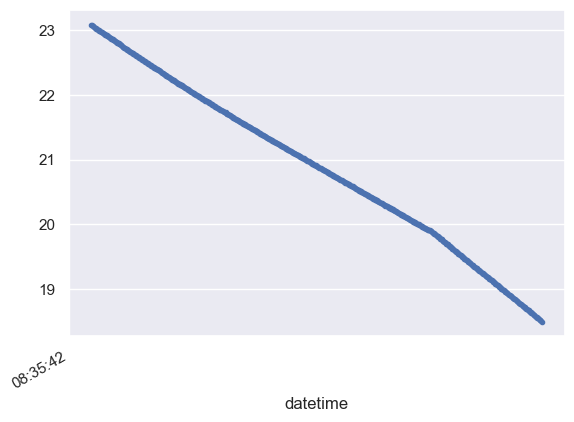

In [4]:
velocity_frames = []
for frame in frames:
    for i in range(len(frame.vehicle.DYNAMICS.velocity)):
        dict_ = {'timestamp': frame.vehicle.DYNAMICS.velocity[i].get_timestamp(), # only for testing...
                 'datetime': pd.to_datetime(int(frame.vehicle.DYNAMICS.velocity[i].timestamp)),
                 'lin_x': frame.vehicle.DYNAMICS.velocity[i].linear_velocity[0],
                 'lin_y': frame.vehicle.DYNAMICS.velocity[i].linear_velocity[0],
                 'lin_z': frame.vehicle.DYNAMICS.velocity[i].linear_velocity[0],
                 'ang_x': frame.vehicle.DYNAMICS.velocity[i].angular_velocity[0],
                 'ang_y': frame.vehicle.DYNAMICS.velocity[i].angular_velocity[0],
                 'ang_z': frame.vehicle.DYNAMICS.velocity[i].angular_velocity[0],
                 'velocity_kmh': np.linalg.norm(np.array(frame.vehicle.DYNAMICS.velocity[i].linear_velocity))*3.6}
        velocity_frames.append(dict_)

velocity_frames = pd.DataFrame(velocity_frames)
velocity_frames.sort_values(by='datetime', inplace=True) # since the individual .4mse files are not sorted, we need to sort the dataframe by time

velocity_frames = velocity_frames.set_index('datetime')
velocity_frames.velocity_kmh.plot(marker='.')
velocity_frames

,lin_x,lin_y,lin_z,ang_x,ang_y,ang_z,qx,qy,qz,qw
datetime,,,,,,,,,,
2024-09-27 08:35:42.301083193,-0.268154,0.221746,10.016763,-0.002151,-0.002328,-0.046734,-0.031267,-0.045631,0.907341,-0.416741
2024-09-27 08:35:42.302590905,-0.237485,0.237569,10.036337,0.000806,-0.001331,-0.045420,-0.031270,-0.045644,0.907356,-0.416706
2024-09-27 08:35:42.303109877,-0.207197,0.255814,9.982473,0.000145,-0.001122,-0.044501,-0.031275,-0.045656,0.907372,-0.416670
2024-09-27 08:35:42.304094106,-0.235930,0.318452,9.996265,0.000504,0.000946,-0.045809,-0.031278,-0.045670,0.907388,-0.416634
2024-09-27 08:35:42.305595848,-0.272183,0.348321,10.068918,-0.001267,0.000194,-0.047210,-0.031281,-0.045683,0.907403,-0.416598
...,...,...,...,...,...,...,...,...,...,...
2024-09-27 08:35:42.896626281,-0.202086,0.160726,9.859941,0.010615,0.004175,-0.036311,-0.033915,-0.051911,0.916047,-0.396248
2024-09-27 08:35:42.897096249,-0.264057,0.300703,9.967982,0.009750,0.001904,-0.037330,-0.033928,-0.051914,0.916060,-0.396216
2024-09-27 08:35:42.898118744,-0.221873,0.387718,9.933295,0.008393,0.000500,-0.037210,-0.033941,-0.051920,0.916074,-0.396184


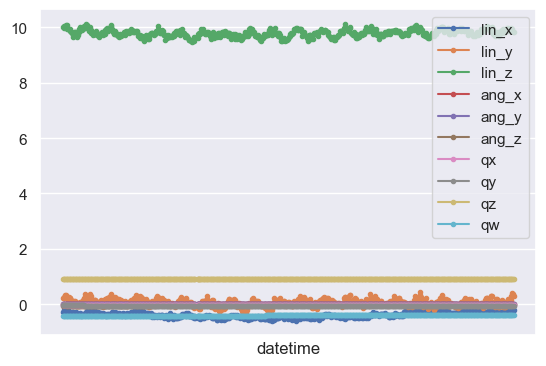

In [5]:
imu_frames = []
for frame in frames:
    for i in range(len(frame.vehicle.IMU.motion)):
        dict_ = {'datetime': pd.to_datetime(int(frame.vehicle.IMU.motion[i].timestamp)),
                 'lin_x': frame.vehicle.IMU.motion[i].linear_acceleration[0],
                 'lin_y': frame.vehicle.IMU.motion[i].linear_acceleration[1],
                 'lin_z': frame.vehicle.IMU.motion[i].linear_acceleration[2],
                 'ang_x': frame.vehicle.IMU.motion[i].angular_velocity[0],
                 'ang_y': frame.vehicle.IMU.motion[i].angular_velocity[1],
                 'ang_z': frame.vehicle.IMU.motion[i].angular_velocity[2],
                 'qx': frame.vehicle.IMU.motion[i].orientation[0],
                 'qy': frame.vehicle.IMU.motion[i].orientation[1],
                 'qz': frame.vehicle.IMU.motion[i].orientation[2],
                 'qw': frame.vehicle.IMU.motion[i].orientation[3]
                 }
        imu_frames.append(dict_)

imu_frames = pd.DataFrame(imu_frames)
imu_frames.sort_values(by='datetime', inplace=True) # since the individual .4mse files are not sorted, we need to sort the dataframe by time

imu_frames = imu_frames.set_index('datetime')
imu_frames.plot(marker='.')
imu_frames

,x,y,z,w
datetime,,,,
2024-09-27 08:35:42.301068138,0.0,0.0,0.707107,0.707107
2024-09-27 08:35:42.302573738,0.0,0.0,0.707107,0.707107
2024-09-27 08:35:42.303086315,0.0,0.0,0.707107,0.707107
2024-09-27 08:35:42.304078078,0.0,0.0,0.707107,0.707107
2024-09-27 08:35:42.305576216,0.0,0.0,0.707107,0.707107
...,...,...,...,...
2024-09-27 08:35:42.896594250,0.0,0.0,0.707107,0.707107
2024-09-27 08:35:42.897080704,0.0,0.0,0.707107,0.707107
2024-09-27 08:35:42.898103618,0.0,0.0,0.707107,0.707107


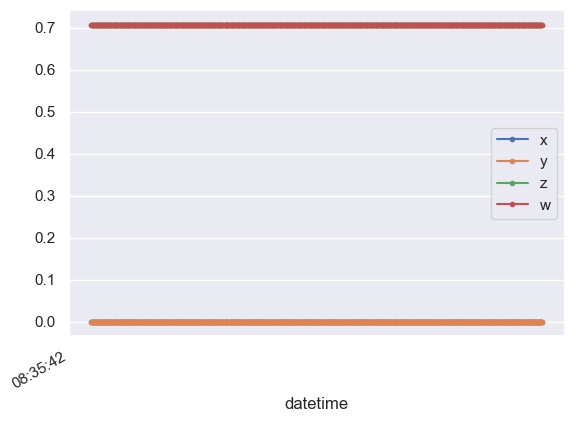

In [6]:
heading_frames = []
for frame in frames:
    for i in range(len(frame.vehicle.DYNAMICS.heading)):
        dict_ = {'datetime': pd.to_datetime(int(frame.vehicle.DYNAMICS.heading[i].timestamp)),
                 'x': frame.vehicle.DYNAMICS.heading[i].orientation[0],
                 'y': frame.vehicle.DYNAMICS.heading[i].orientation[1],
                 'z': frame.vehicle.DYNAMICS.heading[i].orientation[2],
                 'w': frame.vehicle.DYNAMICS.heading[i].orientation[3]
                 }
        heading_frames.append(dict_)

heading_frames = pd.DataFrame(heading_frames)
heading_frames.sort_values(by='datetime', inplace=True) # since the individual .4mse files are not sorted, we need to sort the dataframe by time

heading_frames = heading_frames.set_index('datetime')
heading_frames.plot(marker='.')
heading_frames

,latitude,longitude,distance_m,bearing_rad
datetime,,,,
2024-09-27 08:35:42.301090925,48.739037,9.309221,9.670621,0.061748
2024-09-27 08:35:42.302598610,48.739037,9.309221,9.664454,0.061680
2024-09-27 08:35:42.303117797,48.739037,9.309221,9.658292,0.061611
2024-09-27 08:35:42.304106349,48.739037,9.309221,9.652133,0.061543
2024-09-27 08:35:42.305603782,48.739037,9.309221,9.645976,0.061474
...,...,...,...,...
2024-09-27 08:35:42.896635878,48.739040,9.309276,7.225160,0.024441
2024-09-27 08:35:42.897103480,48.739040,9.309276,7.224290,0.024413
2024-09-27 08:35:42.898126154,48.739040,9.309276,7.223423,0.024384


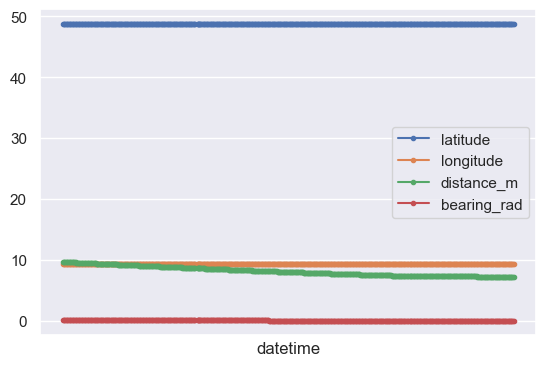

In [7]:
from math import radians, cos, sin, asin, sqrt, atan2

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in meters between two points 
    on the earth (specified in decimal degrees)
    cf: https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371000 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

def bearing(lon1, lat1, lon2, lat2):
    return atan2(sin(lon2 - lon1)*cos(lat2), cos(lat1)*sin(lat2) - sin(lat1)*cos(lat2)*cos(lon2 - lon1))

tower_lat = float(frame.tower.GNSS.position[0].latitude)
tower_lon = float(frame.tower.GNSS.position[0].longitude)

gnss_frames = []
for frame in frames:
    for i in range(len(frame.vehicle.GNSS.position)):
        dict_ = {'datetime': pd.to_datetime(int(frame.vehicle.GNSS.position[i].timestamp)),
                 'latitude': float(frame.vehicle.GNSS.position[i].latitude),
                 'longitude': float(frame.vehicle.GNSS.position[i].longitude),
                 'distance_m': haversine(float(frame.vehicle.GNSS.position[i].longitude), float(frame.vehicle.GNSS.position[i].latitude), tower_lon, tower_lat),
                 'bearing_rad': bearing(float(frame.vehicle.GNSS.position[i].longitude), float(frame.vehicle.GNSS.position[i].latitude), tower_lon, tower_lat)
                 }
        gnss_frames.append(dict_)

gnss_frames = pd.DataFrame(gnss_frames)
gnss_frames.sort_values(by='datetime', inplace=True) # since the individual .4mse files are not sorted, we need to sort the dataframe by time

gnss_frames = gnss_frames.set_index('datetime')
gnss_frames.plot(marker='.')
gnss_frames

In [8]:

lidar_frames = []
for frame in frames:
    dict_ = {'datetime_left': pd.to_datetime(int(frame.vehicle.lidars.LEFT.points.timestamp)),
                'datetime_right': pd.to_datetime(int(frame.vehicle.lidars.RIGHT.points.timestamp)),
                'datetime_top': pd.to_datetime(int(frame.vehicle.lidars.TOP.points.timestamp))
                }
    lidar_frames.append(dict_)

lidar_frames = pd.DataFrame(lidar_frames)
lidar_frames.sort_values(by='datetime_left', inplace=True) # since the individual .4mse files are not sorted, we need to sort the dataframe by time
lidar_frames.reset_index(drop=True, inplace=True)
lidar_frames

,datetime_left,datetime_right,datetime_top
0,2024-09-27 08:35:42.300338386,2024-09-27 08:35:42.300096000,2024-09-27 08:35:42.300009863
1,2024-09-27 08:35:42.400096544,2024-09-27 08:35:42.400003328,2024-09-27 08:35:42.399665704
2,2024-09-27 08:35:42.499980797,2024-09-27 08:35:42.500101376,2024-09-27 08:35:42.499815802
3,2024-09-27 08:35:42.600365730,2024-09-27 08:35:42.600324864,2024-09-27 08:35:42.599684974
4,2024-09-27 08:35:42.700526835,2024-09-27 08:35:42.700182528,2024-09-27 08:35:42.699813134
5,2024-09-27 08:35:42.800337152,2024-09-27 08:35:42.800182272,2024-09-27 08:35:42.799683960
